In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
X

array([[-3.46111994e+00, -1.14411619e+00,  1.52193780e-01, ...,
         1.22463359e-01,  1.47580965e+00,  1.33426915e-01],
       [-7.03000936e-01,  1.80999643e-02,  9.61085968e-01, ...,
        -1.80192268e+00, -1.45041824e+00,  6.26831836e-04],
       [ 6.16415656e-01, -2.84790454e-01,  1.66535881e+00, ...,
        -3.33907452e+00,  1.71941403e-01,  1.08037068e+00],
       ...,
       [ 3.09378814e-01,  3.50499772e-01,  8.62111379e-01, ...,
        -2.35123295e+00,  1.38315717e+00,  6.84657541e-01],
       [-2.47109480e+00,  2.67433035e-01, -8.01856095e-01, ...,
         1.55096629e+00, -5.48649562e-01, -7.58367202e-02],
       [-5.86921906e-01,  8.36898200e-02,  1.06590979e+00, ...,
        -2.76142743e+00, -3.48921726e-01,  1.15339790e-01]])

In [12]:
y

array([0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 2, 1, 0, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2,
       2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0,
       1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 2,
       1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 0,
       2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0,

In [3]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4]:
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]

In [5]:
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_logistic, 'RandomForest': y_pred_rf})

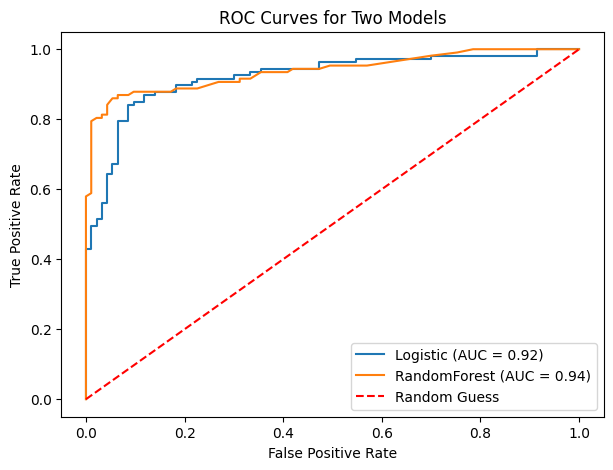

In [6]:
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

# **AUC-ROC for a Multi-Class Model**


# AUC-ROC Curve for Multi-Class Classification

For a multi-class model, we can use the **One-vs-All (OvA)** methodology, where we build one ROC curve for each class.  

For example, if you have four classes **A**, **B**, **C**, and **D**, there would be ROC curves and corresponding AUC values for all four classes:
- When **A** is treated as the positive class, **B**, **C**, and **D** are combined as the negative class.  
- Similarly, when **B** is treated as the positive class, **A**, **C**, and **D** are combined as the negative class, and so on.

---

## General Steps for Using AUC-ROC in Multi-Class Classification

### 1. One-vs-All Methodology
- For each class in your multiclass problem, treat it as the **positive class**, while combining all other classes into the **negative class**.  
- Train a binary classifier for each class against the rest of the classes.

### 2. Calculate AUC-ROC for Each Class
- Plot the **ROC curve** for each class (positive class vs. the rest).  
- Overlay all ROC curves on the same graph — each representing the discrimination ability of the model for a specific class.  
- Examine the **AUC score** for each class.  
  - A **higher AUC** indicates better discrimination performance for that class.

---


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [8]:
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=3, n_informative=10, random_state=42)

y_bin = label_binarize(y, classes=np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42)

In [9]:
logistic_model = OneVsRestClassifier(LogisticRegression(random_state=42))
logistic_model.fit(X_train, y_train)

rf_model = OneVsRestClassifier(
    RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

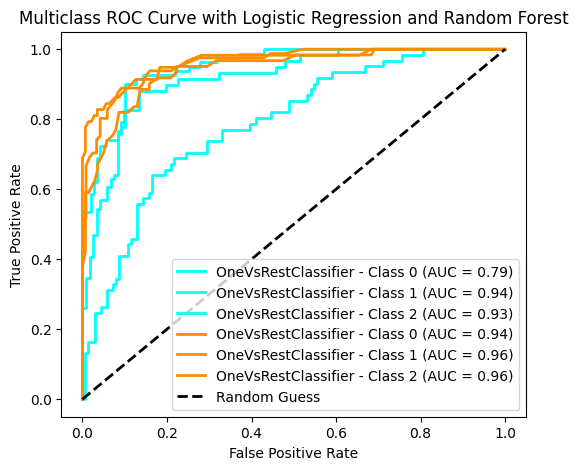

In [10]:
fpr = dict()
tpr = dict()
roc_auc = dict()

models = [logistic_model, rf_model]

plt.figure(figsize=(6, 5))
colors = cycle(['aqua', 'darkorange'])

for model, color in zip(models, colors):
    for i in range(model.classes_.shape[0]):
        fpr[i], tpr[i], _ = roc_curve(
            y_test[:, i], model.predict_proba(X_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{model.__class__.__name__} - Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with Logistic Regression and Random Forest')
plt.legend(loc="lower right")
plt.show()